In [59]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('score.csv')

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


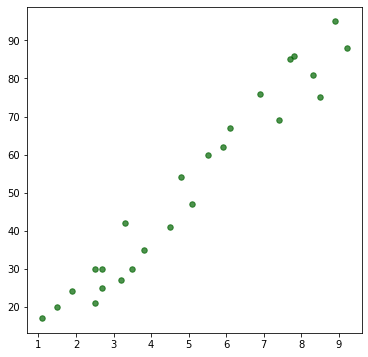

In [64]:
#Plotting the data to see if there's any corelation.
x = np.array(data['Hours']).reshape(-1,1)
y = np.array(data['Scores'])
ax = plt.figure(figsize=(6,6))
plt.scatter(x,y, color = 'darkgreen', alpha = 0.7, s = 30)
plt.show()

In [33]:
regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [34]:
%matplotlib inline

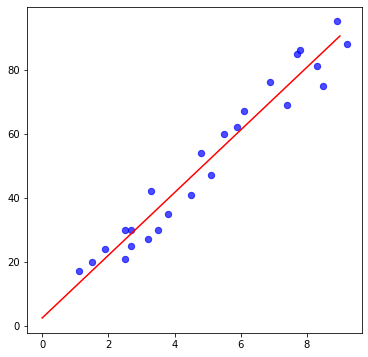

In [74]:
x_linear = np.linspace(0,9,100).reshape(-1,1)
x_predicted = regressor.predict(x_linear)
ax = plt.figure(figsize=(6,6))
plt.plot(x_linear,x_predicted, color = 'red' )
plt.scatter(x,y, color = 'b', alpha = 0.7, s = 40)
plt.show()

In [57]:
#Predicted score if a student studies for 9.25 hrs/day ?
ans = regressor.predict([[9.25]])
ans

array([92.90985477])

In [61]:
#Evaluating the model.
error_score = mean_squared_error(y,regressor.predict(x))
error_score

28.882730509245466

In [125]:
#We'll try adding some higher order features to the data and check if the score improves.
x_squared = x**2
x_cube = x**3
poly_x = np.append(x,x_squared,axis = 1)
poly_x = np.append(poly_x,x_cube, axis = 1).reshape(-1,3)
regressor_poly = LinearRegression()
regressor_poly.fit(poly_x,y)

LinearRegression()

In [126]:
y_pred_poly = regressor_poly.predict(poly_x)
error_score_poly = mean_squared_error(y,y_pred_poly)
error_score_poly

24.202970290074482

In [127]:
ans_2 = regressor_poly.predict([[9.25, 9.25**2,9.25**3]])
ans_2

array([88.35892132])